In [5]:
from mpmath import mp
import numpy


def bisection_search(f, low: float, high: float):
    """
    A root finding method that does not rely on derivatives
    :param f: a function f: X -> R
    :param low: the lower bracket
    :param high: the upper limit bracket
    :return: the location of the root, e.g. f(mid) ~ 0
    """
    # flip high and low if out of order
    if f(high) < f(low):
        low, high = high, low

    # find mid point
    mid = .5 * (low + high)

    while True:

        # bracket up
        if f(mid) < 0:
            low = mid
        # braket down
        else:
            high = mid

        # update mid point
        mid = .5 * (high + low)

        # break if condition met
        if abs(high - low) < 10 ** (-(mp.dps / 2)):
            break

    return mid


def concave_max(f, low: float, high: float):
    """
    Forms a lambda for the approximate derivative and finds the root
    :param f: a function f: X -> R
    :param low: the lower bracket
    :param high: the upper limit bracket
    :return: the location of the root f'(mid) ~ 0
    """
    # create an approximate derivative expression
    scale = high - low

    h = mp.mpf('0.' + ''.join(['0' for i in range(int(mp.dps / 1.5))]) + '1') * scale
    df = lambda x: (f(x + h) - f(x - h)) / (2.0 * h)

    return bisection_search(df, low, high)


def chev_points(n: int, lower: float = -1, upper: float = 1):
    """
    Generates a set of chebychev points spaced in the range [lower, upper]
    :param n: number of points
    :param lower: lower limit
    :param upper: upper limit
    :return: a list of multipressison chebychev points that are in the range [lower, upper]
    """
    # generate chebeshev points on a range [-1, 1]
    index = numpy.arange(1, n + 1)
    range_ = abs(upper - lower)
    return [(.5 * (mp.cos((2 * i - 1) / (2 * n) * mp.pi) + 1)) * range_ + lower for i in index]


def remez(func, n_degree: int, lower: float = -1, upper: float = 1, max_iter: int = 10):
    """
    :param func: a function (or lambda) f: X -> R
    :param n_degree: the degree of the polynomial to approximate the function f
    :param lower: lower range of the approximation
    :param upper: upper range of the approximation
    :return: the polynomial coefficients, and an approximate maximum error associated with this approximation
    """
    # initialize the node points

    x_points = chev_points(n_degree + 2, lower, upper)

    A = mp.matrix(n_degree + 2)
    coeffs = numpy.zeros(n_degree + 2)

    # place in the E column
    mean_error = float('inf')

    for i in range(n_degree + 2):
        A[i, n_degree + 1] = (-1) ** (i + 1)

    for i in range(max_iter):

        # build the system
        vander = numpy.polynomial.chebyshev.chebvander(x_points, n_degree)

        for i in range(n_degree + 2):
            for j in range(n_degree + 1):
                A[i, j] = vander[i, j]

        b = mp.matrix([func(x) for x in x_points])
        l = mp.lu_solve(A, b)

        coeffs = l[:-1]

        # build the residual expression
        r_i = lambda x: (func(x) - numpy.polynomial.chebyshev.chebval(x, coeffs))

        interval_list = list(zip(x_points, x_points[1:]))
        #         interval_list = [[x_points[i], x_points[i+1]] for i in range(len(x_points)-1)]

        intervals = [upper]
        intervals.extend([bisection_search(r_i, *i) for i in interval_list])
        intervals.append(lower)

        extermum_interval = [[intervals[i], intervals[i + 1]] for i in range(len(intervals) - 1)]

        extremums = [concave_max(r_i, *i) for i in extermum_interval]

        extremums[0] = mp.mpf(upper)
        extremums[-1] = mp.mpf(lower)

        errors = [abs(r_i(i)) for i in extremums]
        mean_error = numpy.mean(errors)

        if numpy.max([abs(error - mean_error) for error in errors]) < 0.000001 * mean_error:
            break

        x_points = extremums

    return [float(i) for i in numpy.polynomial.chebyshev.cheb2poly(coeffs)], float(mean_error)



In [6]:
function = lambda x: 1/(1+mp.exp(-x))
poly_coeffs, max_error = remez(function, 3, -5, 5,10000)

In [7]:
poly_coeffs


[0.5020730213559641,
 0.1986952832456499,
 -0.0015706830885683822,
 -0.004001354137220275]

Text(0.5, 1.0, '$f(x)$ v. $P^*_{4}(x)$')

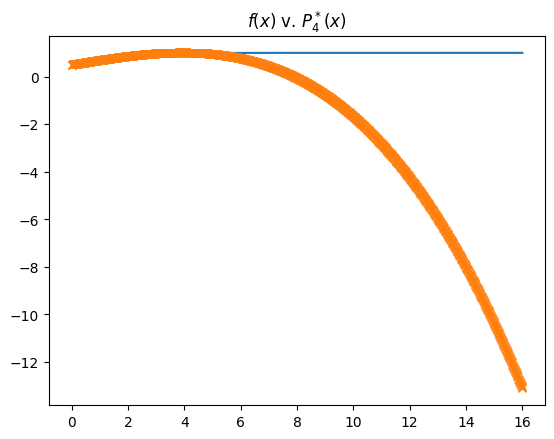

In [8]:
import matplotlib.pyplot as plt
x = numpy.linspace(0, 16, 1000)

y_approx = numpy.polyval(poly_coeffs[::-1], x)
y_exact = numpy.array([function(x_i) for x_i in x])
plt.plot(x, y_exact)
plt.plot(x, y_approx, 'x')
plt.title(r'$f(x)$ v. $P^*_{4}(x)$')

In [21]:
function = lambda x: 1/(1+mp.exp(-x))
poly_coeffs, max_error = remez(function, 3, 0.01, 16,10000)
x = numpy.linspace(0, 16, 1000)

y_approx = numpy.polyval(poly_coeffs[::-1], x)
y_exact = numpy.array([function(x_i) for x_i in x])
plt.plot(x, y_exact)
plt.plot(x, y_approx, 'x')
plt.title(r'$f(x)$ v. $P^*_{4}(x)$')


UFuncTypeError: Cannot cast ufunc 'solve1' input 1 from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def bisection_search(f, low: float, high: float):
    """
    A root finding method that does not rely on derivatives
    :param f: a function f: X -> R
    :param low: the lower bracket
    :param high: the upper limit bracket
    :return: the location of the root, e.g. f(mid) ~ 0
    """
    # flip high and low if out of order
    if f(high) < f(low):
        low, high = high, low

    # find mid point
    mid = .5 * (low + high)

    while True:

        # bracket up
        if f(mid) < 0:
            low = mid
        # braket down
        else:
            high = mid

        # update mid point
        mid = .5 * (high + low)

        # break if condition met
        if abs(high - low) < 10 ** (-np.finfo(float).precision // 2):
            break

    return mid


def concave_max(f, low: float, high: float):
    """
    Forms a lambda for the approximate derivative and finds the root
    :param f: a function f: X -> R
    :param low: the lower bracket
    :param high: the upper limit bracket
    :return: the location of the root f'(mid) ~ 0
    """
    # create an approximate derivative expression
    scale = high - low

    h = np.finfo(float).eps * scale
    df = lambda x: (f(x + h) - f(x - h)) / (2.0 * h)

    return bisection_search(df, low, high)


def chev_points(n: int, lower: float = -1, upper: float = 1):
    """
    Generates a set of chebychev points spaced in the range [lower, upper]
    :param n: number of points
    :param lower: lower limit
    :param upper: upper limit
    :return: a list of multipressison chebychev points that are in the range [lower, upper]
    """
    # generate chebeshev points on a range [-1, 1]
    index = np.arange(1, n + 1)
    range_ = abs(upper - lower)
    return [(.5 * (np.cos((2 * i - 1) / (2 * n) * np.pi) + 1)) * range_ + lower for i in index]


def remez(func, n_degree: int, lower: float = -1, upper: float = 1, max_iter: int = 10):
    """
    :param func: a function (or lambda) f: X -> R
    :param n_degree: the degree of the polynomial to approximate the function f
    :param lower: lower range of the approximation
    :param upper: upper range of the approximation
    :return: the polynomial coefficients, and an approximate maximum error associated with this approximation
    """
    # initialize the node points
    x_points = chev_points(n_degree + 2, lower, upper)

    A = np.zeros((n_degree + 2, n_degree + 2))
    coeffs = np.zeros(n_degree + 2)


    # place in the E column
    mean_error = float('inf')

    for i in range(n_degree + 2):
        A[i, n_degree + 1] = (-1) ** (i + 1)

    for i in range(max_iter):

        # build the system
        vander = numpy.polynomial.chebyshev.chebvander(x_points, n_degree)

        for i in range(n_degree + 2):
            for j in range(n_degree + 1):
                A[i, j] = vander[i, j]

        b = np.array([func(x) for x in x_points])
        l = np.linalg.solve(A, b)


        coeffs = l[:-1]

        # build the residual expression
        r_i = lambda x: (func(x) - numpy.polynomial.chebyshev.chebval(x, coeffs))

        interval_list = list(zip(x_points, x_points[1:]))

        intervals = [upper]
        intervals.extend([bisection_search(r_i, *i) for i in interval_list])
        intervals.append(lower)

        extermum_interval = [[intervals[i], intervals[i + 1]] for i in range(len(intervals) - 1)]

        extremums = [concave_max(r_i, *i) for i in extermum_interval]

        extremums[0] = np.float64(upper)
        extremums[-1] = np.float64(lower)


        errors = [abs(r_i(i)) for i in extremums]
        mean_error = numpy.mean(errors)

        if numpy.max([abs(error - mean_error) for error in errors]) < 0.000001 * mean_error:
            break

        x_points = extremums

    return [float(i) for i in numpy.polynomial.chebyshev.cheb2poly(coeffs)], float(mean_error)


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [10]:
softplus = lambda x: np.log(1+np.exp(x))
sig = lambda x:1/(1+np.exp(-x))

# softplus

In [11]:
poly_coeffs, max_error = remez(softplus, 3, -5, 5,10000)


In [12]:
poly_coeffs

[0.7980839252151725,
 0.5010412618900529,
 0.07216459992097435,
 -4.1650475602117174e-05]

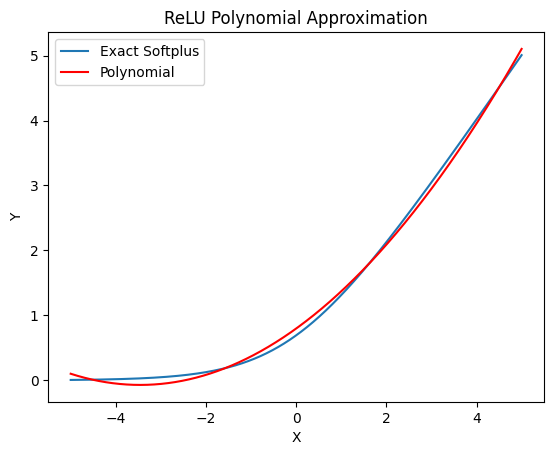

In [13]:
x = numpy.linspace(-5, 5, 10000)

y_approx = numpy.polyval(poly_coeffs[::-1], x)
y_exact = numpy.array([softplus(x_i) for x_i in x])
plt.plot(x, y_exact, label='Exact Softplus')
plt.plot(x, y_approx,label ="Polynomial", c="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title(r'ReLU Polynomial Approximation')
plt.savefig('relu_approximation.png', dpi=300)

[34.39374401191008, 0.424921265243715, 0.0007128909410444628, 1.5322190766588786e-07]
[19.233892906602417, 0.48867205093042787, 0.0016222903713421547, -3.0932971541528026e-08, -1.933178570863216e-09]
[23.24747123702157, 0.5005403261677166, 0.0013920648191117634, 3.6786456432104934e-08, -1.57389436251706e-09, -7.732482223843399e-14]
[14.463198607141951, 0.49532558129585813, 0.002287286830843638, 2.2873022907747214e-07, -7.580364111780408e-09, -5.291862034836981e-13, 8.795754128959458e-15]


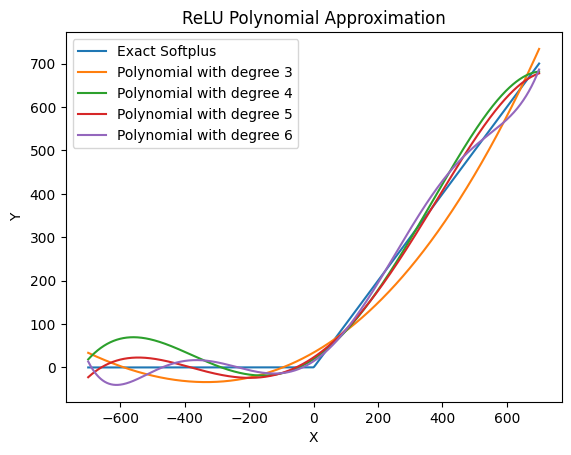

In [54]:
x = numpy.linspace(-700, 700, 10000)
y_exact = numpy.array([softplus(x_i) for x_i in x])
plt.plot(x, y_exact, label='Exact Softplus')
for i in range(3,7):
    poly_coeffs, max_error = remez(softplus,i, -700, 700,10000)
    print(poly_coeffs)
    y_approx = numpy.polyval(poly_coeffs[::-1], x)
    plt.plot(x, y_approx,label =f"Polynomial with degree {i}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.title(r'ReLU Polynomial Approximation')
plt.savefig(f'relu_approximation_bolore.png', dpi=300)

# sigmoid verifying

In [14]:
poly_coeffs, max_error = remez(sig, 3, -5, 5,10000)


Text(0.5, 1.0, '$f(x)$ v. $P^*_{4}(x)$')

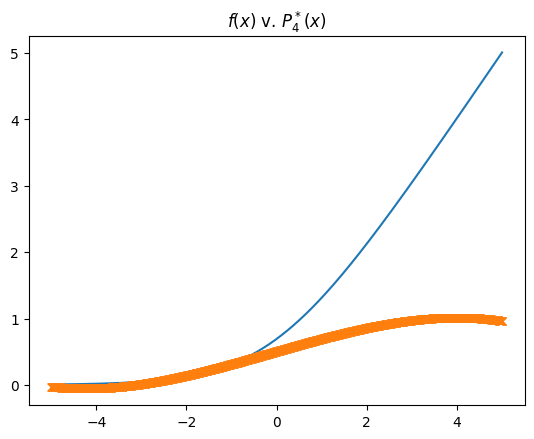

In [115]:
import matplotlib.pyplot as plt
x = numpy.linspace(-5, 5, 1000)

y_approx = numpy.polyval(poly_coeffs[::-1], x)
y_exact = numpy.array([softplus(x_i) for x_i in x])
plt.plot(x, y_exact)
plt.plot(x, y_approx, 'x')
plt.title(r'$f(x)$ v. $P^*_{4}(x)$')

# 1/sqrt(x)

In [15]:
sqrt_x_div = lambda x: 1/np.sqrt(x)

In [17]:
sqrt_x_div(4)

0.5

[1.1301360834734482, -0.17056143062990076, 0.007688567083795711]
[1.2961435200065226, -0.3156018235155614, 0.032503920641032934, -0.0010672934327258514]
[1.4354613321250684, -0.49927619687680475, 0.08889594221152095, -0.006814159289430551, 0.00018287517114652966]


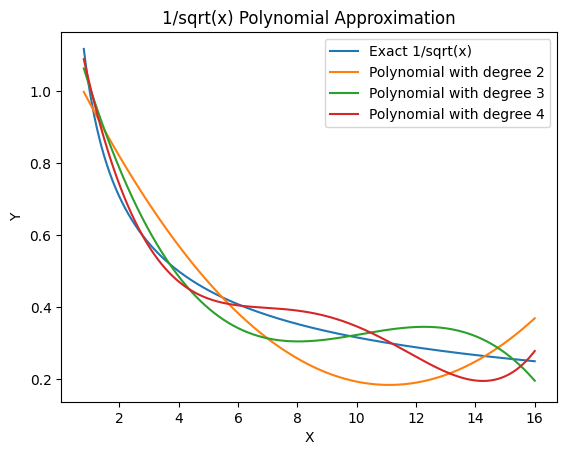

In [22]:
x = numpy.linspace(0.8, 16, 10000)
y_exact = numpy.array([sqrt_x_div(x_i) for x_i in x])
plt.plot(x, y_exact, label='Exact 1/sqrt(x)')
for i in range(2,5):
    poly_coeffs, max_error = remez(sqrt_x_div,i, 0.8, 16,10000)
    print(poly_coeffs)
    y_approx = numpy.polyval(poly_coeffs[::-1], x)
    plt.plot(x, y_approx,label =f"Polynomial with degree {i}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.title(r'1/sqrt(x) Polynomial Approximation')
plt.savefig(f'sqrt_1_x.png', dpi=300)